# Importing Libraries

In [1]:
import os
import pandas as pd
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
from sklearn import neighbors
from sklearn import metrics
import seaborn as sns
from matplotlib.colors import ListedColormap
import pickle

# Importing files

In [4]:
training = "master.csv"
training1 = "lec_tues_4.csv"
training2 = "lab_mon_5.csv"
training3 = "tut_wed_4.csv"
training4 = "lab_fri_4.csv"
training5 = "tut_fri_4.csv"
training6 = "sun_4.csv"
training7 = "lab_wed_5.csv"

path = "C:\\Users\\ieliz\\Documents\\2021\\FYP\\Stress_Detection_FYP\\python_scripts\\"

In [5]:
os.chdir(path)
print(os.getcwd())
df = pd.read_csv(training)
df1 = pd.read_csv(training1)
df2 = pd.read_csv(training2)
df3 = pd.read_csv(training3)
df4 = pd.read_csv(training4)
df5 = pd.read_csv(training5)
df6 = pd.read_csv(training6)
df7 = pd.read_csv(training7)

df = df.append(df1, ignore_index=True)
df = df.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)
df = df.append(df4, ignore_index=True)
df = df.append(df5, ignore_index=True)
df = df.append(df6, ignore_index=True)
df = df.append(df7, ignore_index=True)

df["Time (hr:min:sec)"] = pd.to_datetime(df["Time (hr:min:sec)"], format="%H:%M:%S").dt.time

C:\Users\ieliz\Documents\2021\FYP\Stress_Detection_FYP\python_scripts


In [6]:
# TESTING DATA
test = "lab_wed_4.csv"
test1 = "lab_wed_5.csv"

df_test = pd.read_csv(test)
df_test1 = pd.read_csv(test1)

df_test = df_test.append(df_test1, ignore_index=True)

df_test["Time (hr:min:sec)"] = pd.to_datetime(df_test["Time (hr:min:sec)"], format="%H:%M:%S").dt.time

In [7]:
df

,Time (hr:min:sec),Time (s),GSR,Resistance,Conductance (uS),Heart_Rate,Section,Stressed
0,12:00:01,1,225,51358.88502,19.470828,68,RelaxM4_,2
1,12:00:02,2,224,51111.11111,19.565217,68,RelaxM4_,2
2,12:00:03,3,224,51111.11111,19.565217,69,RelaxM4_,2
3,12:00:04,4,225,51358.88502,19.470828,68,RelaxM4_,2
4,12:00:05,5,224,51111.11111,19.565217,68,RelaxM4_,2
...,...,...,...,...,...,...,...,...
56091,11:31:49,3597,439,260547.94520,3.838065,63,wed_lab_5_3,2
56092,11:31:50,3598,439,260547.94520,3.838065,63,wed_lab_5_3,2
56093,11:31:51,3599,443,276811.59420,3.612565,63,wed_lab_5_3,2
56094,11:31:52,3600,444,281176.47060,3.556485,63,wed_lab_5_3,2


In [8]:
df["Section"].unique()

array(['RelaxM4_', 'LabM4_1_', 'LabM4_2_', 'LabM4_3_', 'lec_tues_0',
       'lab_mon_5', 'lab_mon_5_1', 'tut_wed_4_0', 'tut_wed_4_1',
       'lab_fri4_1', 'tut_fri4_1', 'tut_fri4_2', 'sun_data_1', 'sun_data',
       'wed_lab_5_1', 'wed_lab_5_2', 'wed_lab_5_3'], dtype=object)

# Calculating Conductance

In [9]:
# df["Conductance (uS)"] = 1*10**6/df["Resistance"]

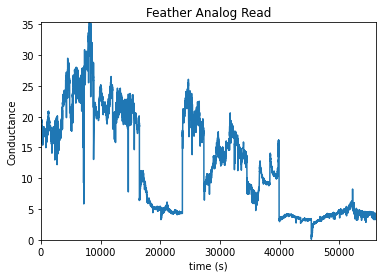

In [10]:
fig, ax = plt.subplots()
ax.set_xlim((0, len(df)))
ax.set_ylim((0, max(df["Conductance (uS)"])))
ax.set_title('Feather Analog Read')
ax.set_xlabel("time (s)")
ax.set_ylabel("Conductance")
ax.plot(df.index, df["Conductance (uS)"])

# Pre-processing Data and Feature Extraction
## Separating into sections

In [11]:
df["Section_labels"] = df["Section"] + df["Stressed"].astype(str)
unique_sections = df["Section_labels"].unique()
unique_sections_num = df["Section_labels"].nunique()
print(unique_sections)

labels = []
for name in unique_sections:
    curr_label = df.loc[df["Section_labels"] == name, 'Stressed'].unique()[0]
    labels.append(curr_label)
    
print(labels)

['RelaxM4_2' 'LabM4_1_6' 'LabM4_1_4' 'LabM4_2_7' 'LabM4_3_6' 'LabM4_3_4'
 'lec_tues_04' 'lab_mon_55' 'lab_mon_53' 'lab_mon_52' 'lab_mon_54'
 'lab_mon_5_13' 'lab_mon_5_11' 'lab_mon_5_14' 'lab_mon_5_16'
 'lab_mon_5_17' 'tut_wed_4_02' 'tut_wed_4_05' 'tut_wed_4_12'
 'tut_wed_4_14' 'lab_fri4_14' 'lab_fri4_17' 'lab_fri4_13' 'lab_fri4_15'
 'tut_fri4_14' 'tut_fri4_13' 'tut_fri4_15' 'tut_fri4_23' 'tut_fri4_24'
 'tut_fri4_25' 'tut_fri4_27' 'sun_data_14' 'sun_data_15' 'sun_data_13'
 'sun_data_16' 'sun_data_12' 'sun_data2' 'sun_data4' 'sun_data3'
 'wed_lab_5_14' 'wed_lab_5_15' 'wed_lab_5_13' 'wed_lab_5_16'
 'wed_lab_5_24' 'wed_lab_5_25' 'wed_lab_5_27' 'wed_lab_5_23'
 'wed_lab_5_34' 'wed_lab_5_35' 'wed_lab_5_33' 'wed_lab_5_36'
 'wed_lab_5_32']
[2, 6, 4, 7, 6, 4, 4, 5, 3, 2, 4, 3, 1, 4, 6, 7, 2, 5, 2, 4, 4, 7, 3, 5, 4, 3, 5, 3, 4, 5, 7, 4, 5, 3, 6, 2, 2, 4, 3, 4, 5, 3, 6, 4, 5, 7, 3, 4, 5, 3, 6, 2]


## Moving average filter

In [12]:
def moving_ave_filter(df):
    df["Conductance (uS)"] = df["Conductance (uS)"].rolling(2).mean()  #1 second moving average filter
    df["Heart_Rate"] = df["Heart_Rate"].rolling(2).mean()  #1 second moving average filter
    df = df.dropna()
    return df

In [13]:
df = df.groupby(df["Section_labels"]).apply(moving_ave_filter)    

In [14]:
df

Time (hr:min:sec)  Time (s)  GSR    Resistance  \
Section_labels                                                        
LabM4_1_4      1501           13:05:02      1502  238   54744.52555   
               1502           13:05:03      1503  238   54744.52555   
               1503           13:05:04      1504  238   54744.52555   
               1504           13:05:05      1505  238   54744.52555   
               1505           13:05:06      1506  237   54472.72727   
...                                ...       ...  ...           ...   
wed_lab_5_36   55747          11:26:02      3253  435  245974.02600   
               55748          11:26:03      3254  436  249473.68420   
               55749          11:26:04      3255  440  264444.44440   
               55750          11:26:05      3256  439  260547.94520   
               55751          11:26:06      3257  439  260547.94520   

                      Conductance (uS)  Heart_Rate      Section  Stressed  \
Section_labels                                                              
LabM4_1_4      1501          18.312239        78.0     LabM4_1_         4   
               1502          18.266667        78.0     LabM4_1_         4   
               1503          18.266667        78.0     LabM4_1_         4   
               1504          18.266667        78.0     LabM4_1_         4   
               1505          18.312239        80.5     LabM4_1_         4   
...                                ...         ...          ...       ...   
wed_lab_5_36   55747          4.122682        80.5  wed_lab_5_3         6   
               55748          4.036954        80.5  wed_lab_5_3         6   
               55749          3.894976        81.0  wed_lab_5_3         6   
               55750          3.809789        81.0  wed_lab_5_3         6   
               55751          3.838065        81.0  wed_lab_5_3         6   

                     Section_labels  
Section_labels                       
LabM4_1_4      1501       LabM4_1_4  
               1502       LabM4_1_4  
               1503       LabM4_1_4  
               1504       LabM4_1_4  
               1505       LabM4_1_4  
...                             ...  
wed_lab_5_36   55747   wed_lab_5_36  
               55748   wed_lab_5_36  
               55749   wed_lab_5_36  
               55750   wed_lab_5_36  
               55751   wed_lab_5_36  

[56044 rows x 9 columns]

## Min-Max Normalisation

In [15]:
def min_max_normalisation(df):
    min_val_gsr = min(df['Conductance (uS)'])
    max_val_gsr = max(df['Conductance (uS)'])
    scaling_gsr = max_val_gsr-min_val_gsr
    df.loc[:, 'Normalised_GSR'] = (df.loc[:, 'Conductance (uS)']- min_val_gsr)/scaling_gsr 
    
    min_val_hr = min(df["Heart_Rate"])
    max_val_hr = max(df["Heart_Rate"])
    scaling_hr = max_val_hr-min_val_hr
    df.loc[:, "Normalised_HR"] = (df.loc[:, "Heart_Rate"]- min_val_hr)/scaling_hr 
    return df

In [16]:
df = df.groupby(df["Section_labels"]).apply(min_max_normalisation)

In [17]:
df

Time (hr:min:sec)  Time (s)  GSR    Resistance  \
Section_labels                                                        
LabM4_1_4      1501           13:05:02      1502  238   54744.52555   
               1502           13:05:03      1503  238   54744.52555   
               1503           13:05:04      1504  238   54744.52555   
               1504           13:05:05      1505  238   54744.52555   
               1505           13:05:06      1506  237   54472.72727   
...                                ...       ...  ...           ...   
wed_lab_5_36   55747          11:26:02      3253  435  245974.02600   
               55748          11:26:03      3254  436  249473.68420   
               55749          11:26:04      3255  440  264444.44440   
               55750          11:26:05      3256  439  260547.94520   
               55751          11:26:06      3257  439  260547.94520   

                      Conductance (uS)  Heart_Rate      Section  Stressed  \
Section_labels                                                              
LabM4_1_4      1501          18.312239        78.0     LabM4_1_         4   
               1502          18.266667        78.0     LabM4_1_         4   
               1503          18.266667        78.0     LabM4_1_         4   
               1504          18.266667        78.0     LabM4_1_         4   
               1505          18.312239        80.5     LabM4_1_         4   
...                                ...         ...          ...       ...   
wed_lab_5_36   55747          4.122682        80.5  wed_lab_5_3         6   
               55748          4.036954        80.5  wed_lab_5_3         6   
               55749          3.894976        81.0  wed_lab_5_3         6   
               55750          3.809789        81.0  wed_lab_5_3         6   
               55751          3.838065        81.0  wed_lab_5_3         6   

                     Section_labels  Normalised_GSR  Normalised_HR  
Section_labels                                                      
LabM4_1_4      1501       LabM4_1_4        0.525135       0.355556  
               1502       LabM4_1_4        0.519731       0.355556  
               1503       LabM4_1_4        0.519731       0.355556  
               1504       LabM4_1_4        0.519731       0.355556  
               1505       LabM4_1_4        0.525135       0.411111  
...                             ...             ...            ...  
wed_lab_5_36   55747   wed_lab_5_36        0.606612       0.386792  
               55748   wed_lab_5_36        0.523026       0.386792  
               55749   wed_lab_5_36        0.384596       0.396226  
               55750   wed_lab_5_36        0.301538       0.396226  
               55751   wed_lab_5_36        0.329107       0.396226  

[56044 rows x 11 columns]

## Extract Phasic components

## Applying low pass filter

In [18]:
# def butter_lowpass(cutoff, fs, order=5):
#     nyq = 0.5 * fs
#     normal_cutoff = cutoff / nyq
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     return b, a

# def butter_lowpass_filter(data, cutoff, fs, order=5):
#     b, a = butter_lowpass(cutoff, fs, order=order)
#     y = lfilter(b, a, data)
#     return y

In [19]:
# def low_pass(df):
#     df["LPF_GSR"] = butter_lowpass_filter(df["Normalised_GSR"], cutoff, fs, order)
#     df["LPF_HR"] = butter_lowpass_filter(df["Normalised_HR"], cutoff, fs, order)
#     return df

## Identifying onset and offset of stressor
## Find peaks and maximum amplitude
## Find average

In [20]:
# # For each section of data
# # Label as stressed/not stressed
# # Find peak, maximum amplitude and average GSR
# # Training data: peak, max and average GSR + label

# # Filter requirements
# order = 6
# fs = 60      # sample rate, Hz
# cutoff = 20  # desired cutoff frequency of the filter, Hz

In [21]:
# # Low pass filter
# df = df.groupby(df["Section_labels"]).apply(low_pass)

In [22]:
# df

In [23]:
# Finding max, min and average test values
GSR_peaks = []
GSR_max_peaks = []
GSR_min_peaks = []
GSR_num_peaks = []
GSR_average = []

HR_peaks = []
HR_max_peaks = []
HR_min_peaks = []
HR_num_peaks = []
HR_average = []

0 1.0 0.10256410256410256 1.0 0.3979785407904398 0.4263809584910502 0.6388674353257291 2
1 1.0 0.058823529411764705 1.0 0.16590210687255996 0.29494376430775354 0.45724529479346715 6
2 1.0 0.08888888888888889 1.0 0.3870135931861308 0.35527907378607226 0.5713559848166448 4
3 1.0 0.037037037037037035 1.0 0.19191267082791186 0.2815133833472261 0.6239504880946904 7
4 1.0 0.045454545454545456 1.0 0.03608800538245207 0.3253377324000178 0.5391861060824056 6
5 1.0 0.10101010101010101 1.0 0.020586261288277924 0.382659176757958 0.4214854129639833 4
6 1.0 0.13513513513513514 1.0 0.5420125701040237 0.3973263586166812 0.7637412506217797 4
7 1.0 0.18181818181818182 1.0 0.019354644586462875 0.428481913019916 0.6478464385794419 5
8 1.0 0.15151515151515152 1.0 0.10603220524107822 0.46819338422391865 0.47718568844225173 3
9 1.0 0.29292929292929293 0.1895592425470093 0.07496233824185136 0.519805820383855 0.13612845798099066 2
10 1.0 0.045112781954887216 1.0 0.013124321838530508 0.4263438127852797 0.346134

ValueError: max() arg is an empty sequence

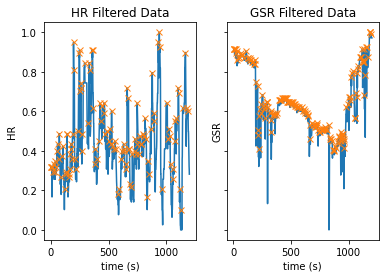

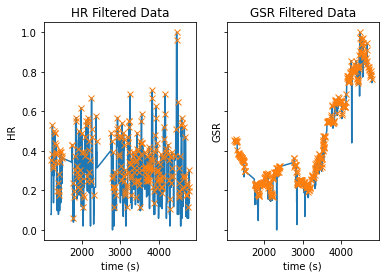

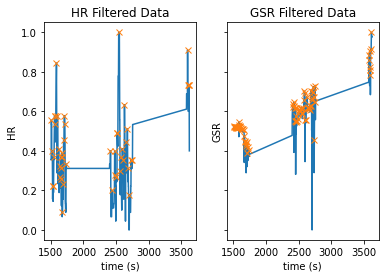

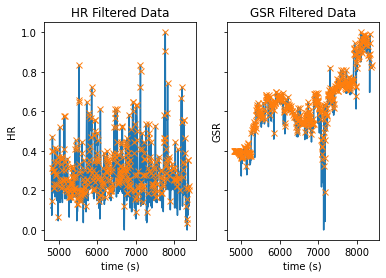

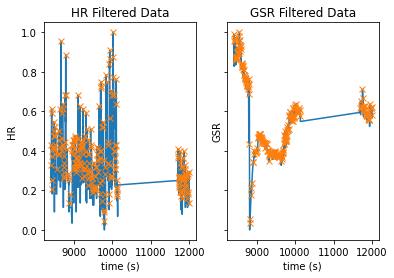

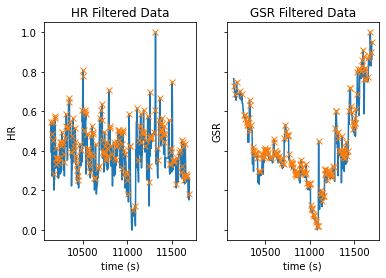

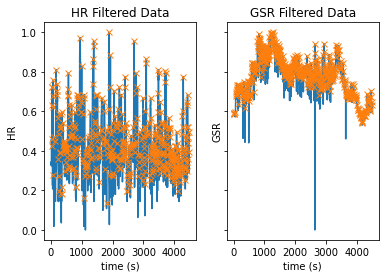

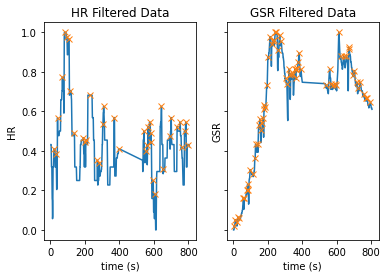

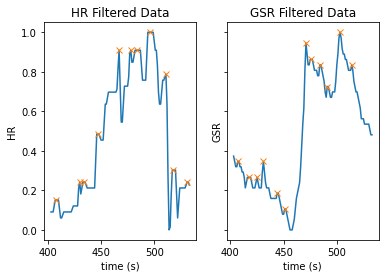

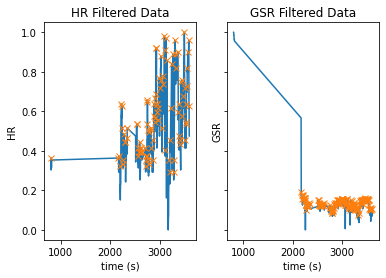

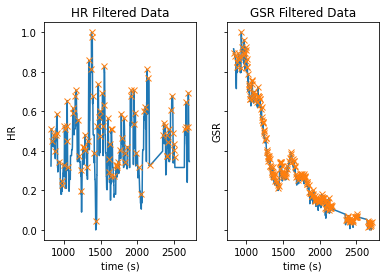

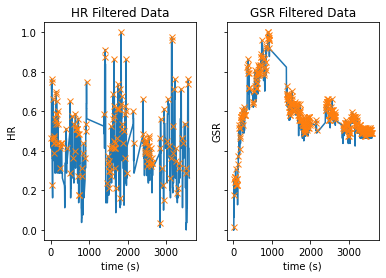

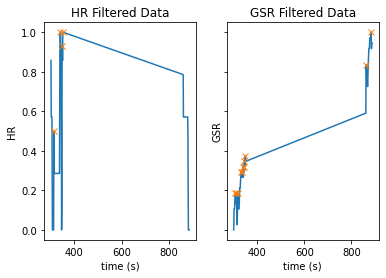

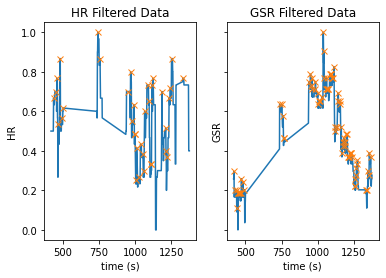

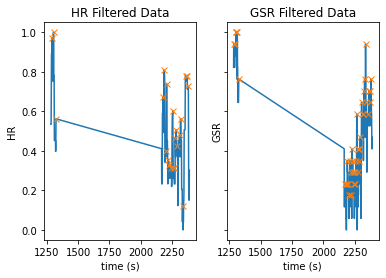

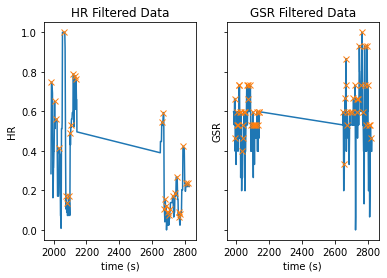

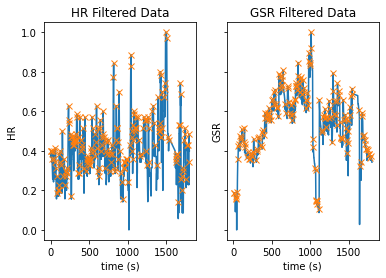

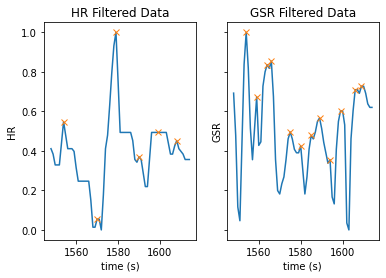

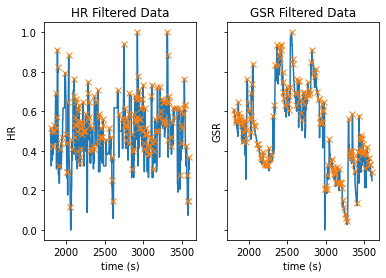

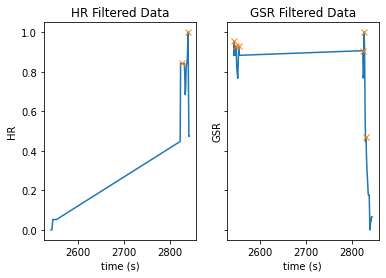

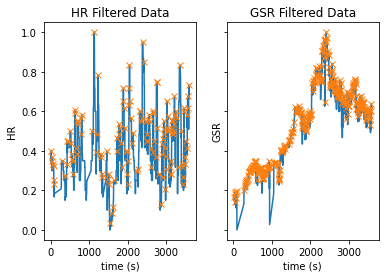

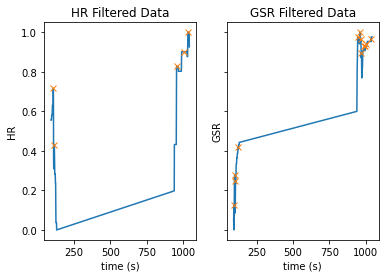

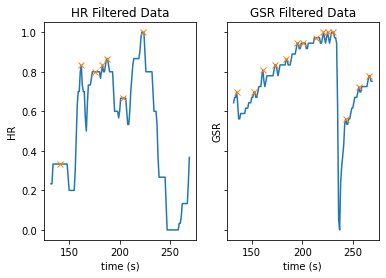

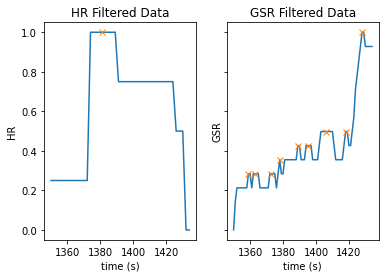

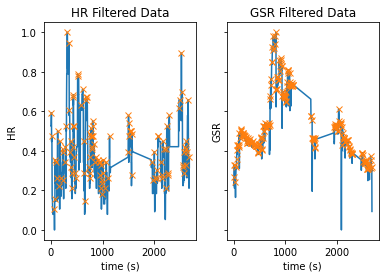

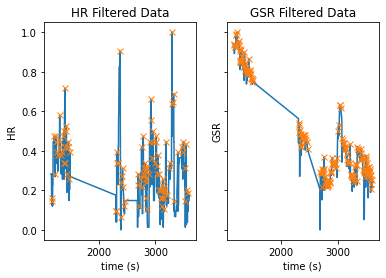

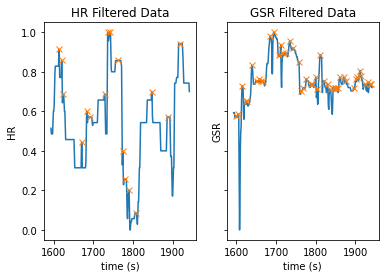

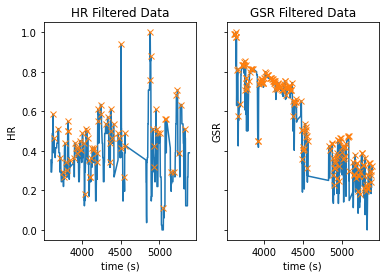

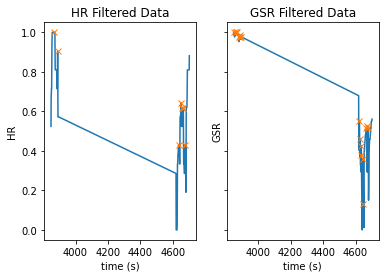

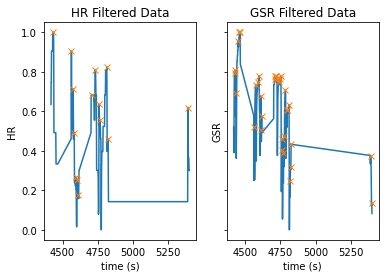

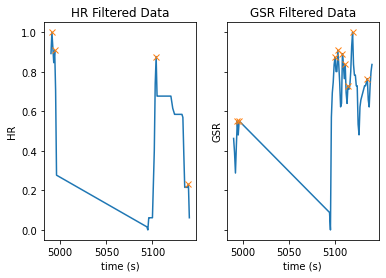

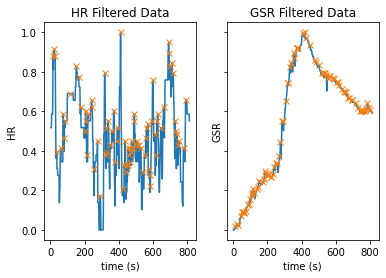

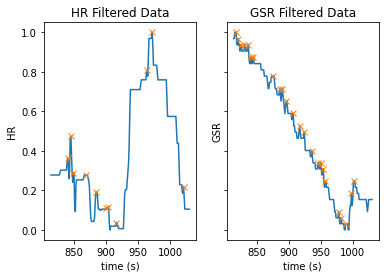

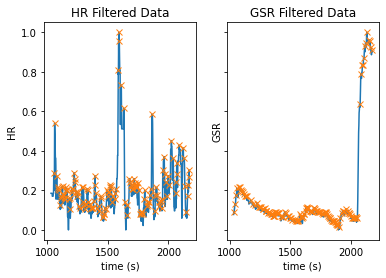

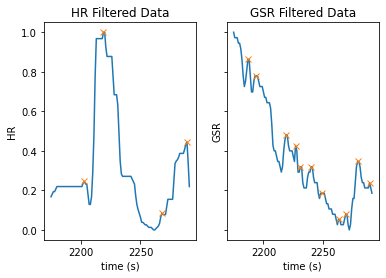

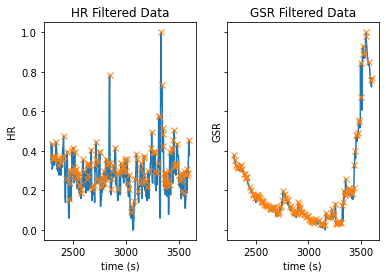

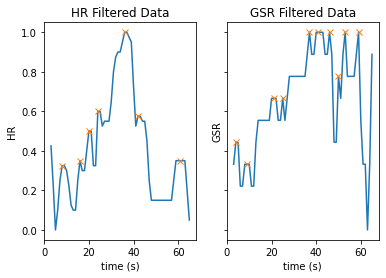

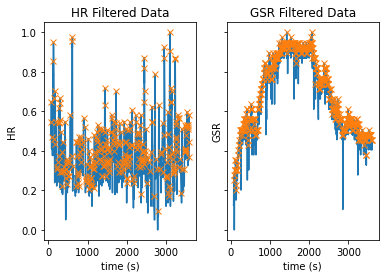

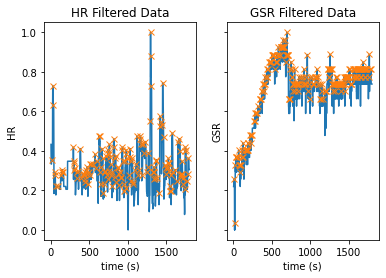

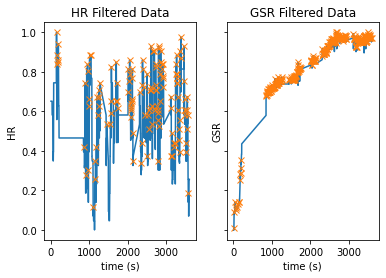

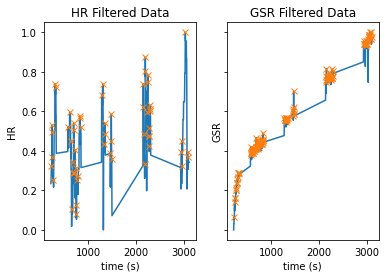

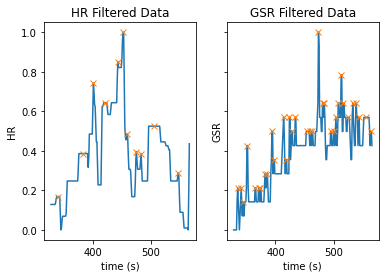

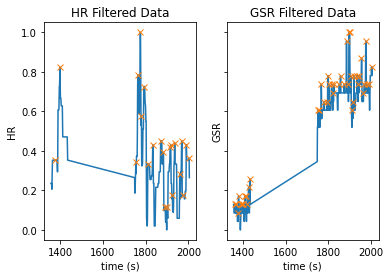

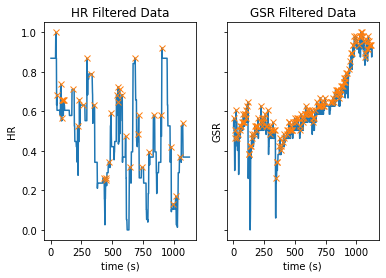

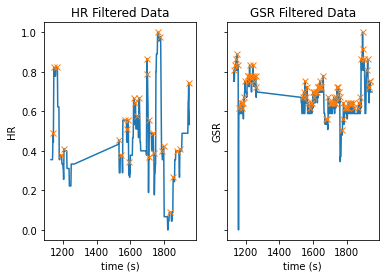

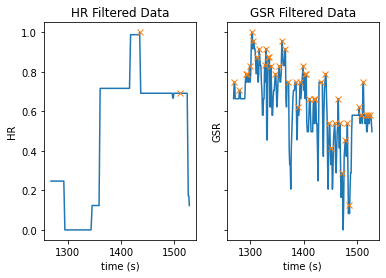

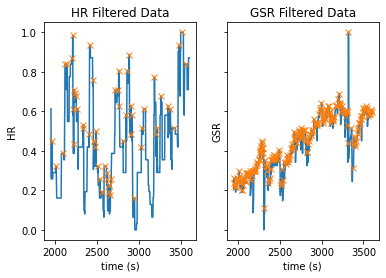

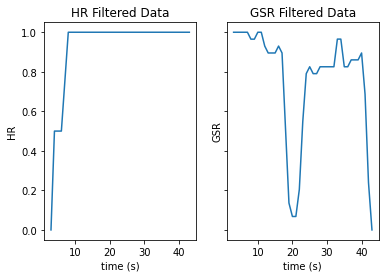

In [24]:
for i in range(unique_sections_num):
    grouped = df.groupby(df["Section_labels"])
    section = grouped.get_group(unique_sections[i])
    time = section['Time (s)'].to_numpy()
    HR_data = section["Normalised_HR"].to_numpy()
    GSR_data = section["Normalised_GSR"].to_numpy()
    #print('time', time, data)
    
    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
    ax1.set_title('HR Filtered Data')
    ax1.set_xlabel("time (s)")
    ax1.set_ylabel("HR")
    ax1.plot(time, HR_data)
    ax2.set_title('GSR Filtered Data')
    ax2.set_xlabel("time (s)")
    ax2.set_ylabel("GSR")
    ax2.plot(time, GSR_data)
    
    curr_peaks_ind, _ = find_peaks(HR_data)
    curr_peaks = HR_data[curr_peaks_ind]
    HR_max_peak = max(curr_peaks)
    HR_min_peak = min(curr_peaks)

    ax1.plot(time[curr_peaks_ind],curr_peaks, "x")
    
    HR_peaks.append(curr_peaks)
    HR_num_peaks.append(len(curr_peaks))
    HR_max_peaks.append(HR_max_peak)
    HR_min_peaks.append(HR_min_peak)
    
    HR_ave = np.mean(HR_data)
    HR_average.append(HR_ave)
    
    curr_peaks_ind, _ = find_peaks(GSR_data)
    curr_peaks = GSR_data[curr_peaks_ind]
    GSR_max_peak = max(curr_peaks)
    GSR_min_peak = min(curr_peaks)

    ax2.plot(time[curr_peaks_ind],curr_peaks, "x")
    
    GSR_peaks.append(curr_peaks)
    GSR_num_peaks.append(len(curr_peaks))
    GSR_max_peaks.append(GSR_max_peak)
    GSR_min_peaks.append(GSR_min_peak)
    
    GSR_ave = np.mean(GSR_data)
    GSR_average.append(GSR_ave)
    
    print(i, HR_max_peak, HR_min_peak, GSR_max_peak, GSR_min_peak, HR_ave, GSR_ave, labels[i])

In [25]:
stress_df = pd.DataFrame()
stress_df['HR_Max'] = pd.Series(HR_max_peaks)
stress_df['GSR_Max'] = pd.Series(GSR_max_peaks)
stress_df['HR_Min'] = pd.Series(HR_min_peaks)
stress_df['GSR_Min'] = pd.Series(GSR_min_peaks)
stress_df['HR_Ave'] = pd.Series(HR_average)
stress_df['GSR_Ave'] = pd.Series(GSR_average)
stress_df['Stress'] = pd.Series(labels)
stress_df

,HR_Max,GSR_Max,HR_Min,GSR_Min,HR_Ave,GSR_Ave,Stress
0,1.0,1.000000,0.102564,0.397979,0.426381,0.638867,2
1,1.0,1.000000,0.058824,0.165902,0.294944,0.457245,6
2,1.0,1.000000,0.088889,0.387014,0.355279,0.571356,4
3,1.0,1.000000,0.037037,0.191913,0.281513,0.623950,7
4,1.0,1.000000,0.045455,0.036088,0.325338,0.539186,6
5,1.0,1.000000,0.101010,0.020586,0.382659,0.421485,4
6,1.0,1.000000,0.135135,0.542013,0.397326,0.763741,4
7,1.0,1.000000,0.181818,0.019355,0.428482,0.647846,5
8,1.0,1.000000,0.151515,0.106032,0.468193,0.477186,3
9,1.0,0.189559,0.292929,0.074962,0.519806,0.136128,2


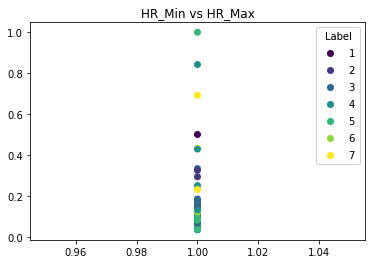

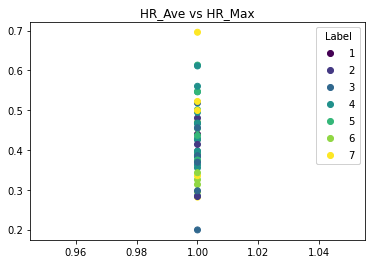

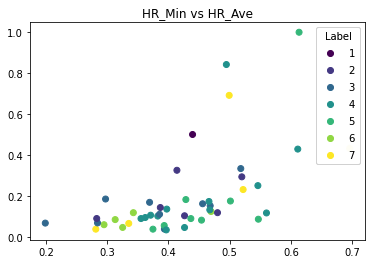

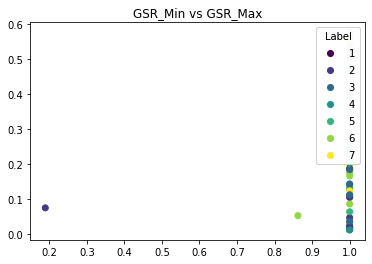

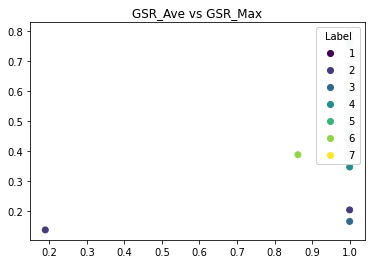

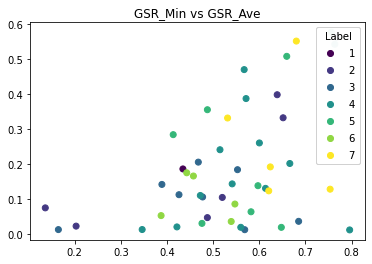

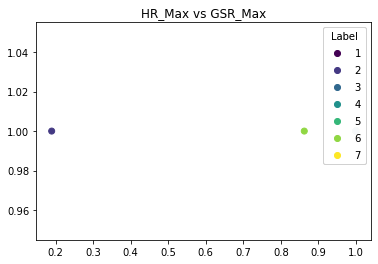

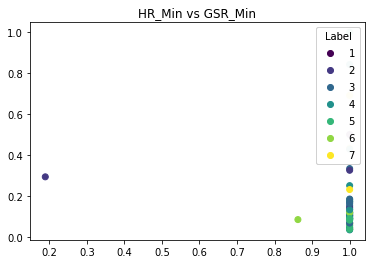

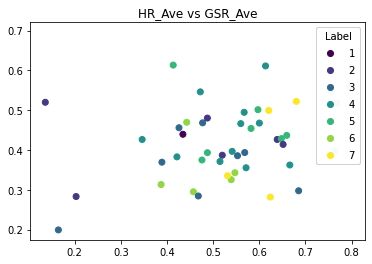

In [26]:
figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df[stress_df.columns[0]],stress_df[stress_df.columns[2]], c=stress_df[stress_df.columns[6]], cmap="viridis")
plt.title("HR_Min vs HR_Max")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()
figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df[stress_df.columns[0]],stress_df[stress_df.columns[4]], c=stress_df[stress_df.columns[6]], cmap="viridis")
plt.title("HR_Ave vs HR_Max")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()
figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df[stress_df.columns[4]],stress_df[stress_df.columns[2]], c=stress_df[stress_df.columns[6]], cmap="viridis")
plt.title("HR_Min vs HR_Ave")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()

figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df[stress_df.columns[1]],stress_df[stress_df.columns[3]], c=stress_df[stress_df.columns[6]], cmap="viridis")
plt.title("GSR_Min vs GSR_Max")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()
figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df[stress_df.columns[1]],stress_df[stress_df.columns[5]], c=stress_df[stress_df.columns[6]], cmap="viridis")
plt.title("GSR_Ave vs GSR_Max")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()
figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df[stress_df.columns[5]],stress_df[stress_df.columns[3]], c=stress_df[stress_df.columns[6]], cmap="viridis")
plt.title("GSR_Min vs GSR_Ave")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()

figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df[stress_df.columns[1]],stress_df[stress_df.columns[0]], c=stress_df[stress_df.columns[6]], cmap="viridis")
plt.title("HR_Max vs GSR_Max")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()
figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df[stress_df.columns[1]],stress_df[stress_df.columns[2]], c=stress_df[stress_df.columns[6]], cmap="viridis")
plt.title("HR_Min vs GSR_Min")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()
figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df[stress_df.columns[5]],stress_df[stress_df.columns[4]], c=stress_df[stress_df.columns[6]], cmap="viridis")
plt.title("HR_Ave vs GSR_Ave")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()

# K-Nearest Neighbours

In [27]:
n_neighbours = 10
X = stress_df.loc[:, ['HR_Max', 'GSR_Max', 'HR_Min', 'GSR_Min', 'HR_Ave', 'GSR_Ave']]
y = stress_df.loc[:, 'Stress']

In [28]:
weight = 'uniform'#'distance'
clf = neighbors.KNeighborsClassifier(n_neighbours, weight)
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=10)

In [29]:
# # Plotting decision boundary
# # # Colour maps
# # cmap_light = ListedColormap(['cyan', 'cornflowerblue'])
# # cmap_dark = ['c', 'darkblue']

# h = 0.005 # step size in mesh

# x_min, x_max = X.iloc[:, 0].min()-1, X.iloc[:, 0].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(x_min, x_max, h))

# Z = clf.predict(np.c_[xx.ravel(), xx.ravel(), xx.ravel(), xx.ravel()])

# # Put result into a colour plot
# Z = Z.reshape(xx.shape)
# plt.figure(figsize=(8, 6))
# plt.contourf(xx, xx, Z) #cmap=cmap_light

# # Plot also the training points
# # sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y,
# #                 palette=cmap_dark, alpha=1.0, edgecolor="black")
# sns.scatterplot(x=X.iloc[:, 2], y=X.iloc[:, 3], hue=y, alpha=1.0, edgecolor="black")
# plt.xlim(xx.min(), xx.max())
# plt.ylim(xx.min(), xx.max())
# plt.title("Classification")
# plt.show()

In [30]:
# Save the trained model
# saved_model_name = "knn_model_all.sav"
# saved_model = pickle.dump(clf, open(saved_model_name, "wb"))

# TESTING DATA

In [31]:
# TESTING DATA
df_test["Section_labels"] = df_test["Section"] + df_test["Stressed"].astype(str)
unique_sections_test = df_test["Section_labels"].unique()
unique_sections_num_test = df_test["Section_labels"].nunique()
print(unique_sections_test)

labels_test = []
for name in unique_sections_test:
    curr_label = df_test.loc[df_test["Section_labels"] == name, 'Stressed'].unique()[0]
    labels_test.append(curr_label)
    
print(labels_test)

['lab_wed_4_04' 'lab_wed_4_05' 'lab_wed_4_14' 'lab_wed_4_15'
 'lab_wed_4_13' 'lab_wed_4_22' 'lab_wed_4_23' 'wed_lab_5_14'
 'wed_lab_5_15' 'wed_lab_5_13' 'wed_lab_5_16' 'wed_lab_5_24'
 'wed_lab_5_25' 'wed_lab_5_27' 'wed_lab_5_23' 'wed_lab_5_34'
 'wed_lab_5_35' 'wed_lab_5_33' 'wed_lab_5_36' 'wed_lab_5_32']
[4, 5, 4, 5, 3, 2, 3, 4, 5, 3, 6, 4, 5, 7, 3, 4, 5, 3, 6, 2]


In [33]:
# Moving average filter
df_test = df_test.groupby(df_test["Section_labels"]).apply(moving_ave_filter)

# Min-max normalisation
df_test = df_test.groupby(df_test["Section_labels"]).apply(min_max_normalisation)   

# Low pass filter
#df_test = df_test.groupby(df_test["Section_labels"]).apply(low_pass)   

In [34]:
# Finding max and average test values
GSR_peaks_test = []
GSR_max_peaks_test = []
GSR_min_peaks_test = []
GSR_num_peaks_test = []
GSR_average_test = []

HR_peaks_test = []
HR_max_peaks_test = []
HR_min_peaks_test = []
HR_num_peaks_test = []
HR_average_test = []

In [35]:
for i in range(unique_sections_num_test):
    grouped = df_test.groupby(df_test["Section_labels"])
    section = grouped.get_group(unique_sections_test[i])
    time = section['Time (s)'].to_numpy()
    HR_data = section["Normalised_HR"].to_numpy()
    GSR_data = section["Normalised_GSR"].to_numpy()
    #print('time', time, data)
       
    curr_peaks_ind, _ = find_peaks(HR_data)
    curr_peaks = HR_data[curr_peaks_ind]
    HR_max_peak_test = max(curr_peaks)
    HR_min_peak_test = min(curr_peaks)
    
    HR_peaks_test.append(curr_peaks)
    HR_num_peaks_test.append(len(curr_peaks))
    HR_max_peaks_test.append(HR_max_peak_test)
    HR_min_peaks_test.append(HR_min_peak_test)
    
    HR_ave_test = np.mean(HR_data)
    HR_average_test.append(HR_ave_test)
    
    curr_peaks_ind, _ = find_peaks(GSR_data)
    curr_peaks = GSR_data[curr_peaks_ind]
    GSR_max_peak_test = max(curr_peaks)
    GSR_min_peak_test = min(curr_peaks)
    
    GSR_peaks_test.append(curr_peaks)
    GSR_num_peaks_test.append(len(curr_peaks))
    GSR_max_peaks_test.append(GSR_max_peak)
    GSR_min_peaks_test.append(GSR_min_peak)
    
    GSR_ave_test = np.mean(GSR_data)
    GSR_average_test.append(GSR_ave_test)
    
    print(i, HR_max_peak_test, GSR_max_peak_test, HR_min_peak_test, GSR_min_peak_test, HR_ave_test, GSR_ave_test, labels_test[i])

0 1.0 1.0 0.10588235294117647 0.0668200215142106 0.4327323656735421 0.573366752409778 4
1 1.0 1.0 0.2807017543859649 0.04429541358080091 0.4934814936457107 0.5354571590613378 5
2 1.0 1.0 0.13636363636363635 0.0964489829298698 0.4493916619585069 0.48416830150568996 4
3 1.0 1.0 0.09375 0.4192753457349524 0.4659090909090909 0.6998828751084457 5
4 1.0 1.0 0.14893617021276595 0.28353101142632336 0.4214839139251233 0.6219554102251852 3
5 1.0 1.0 0.11458333333333333 0.35398721922449955 0.36344944363812287 0.6044756525261505 2
6 1.0 1.0 0.061224489795918366 0.056126711702374765 0.44499256656304903 0.38189267585150466 3
7 1.0 1.0 0.10179640718562874 0.009014689727038852 0.5708739420098428 0.796117731910254 4
8 1.0 1.0 0.06046511627906977 0.053798795518074746 0.45042035156676496 0.5834278343043978 5
9 1.0 1.0 0.16417910447761194 0.18409731052303976 0.3665077971487102 0.4041334383889871 3
10 1.0 1.0 0.10416666666666667 0.10993285897599005 0.3437033582089552 0.5597218538547754 6
11 1.0 1.0 0.12666

ValueError: max() arg is an empty sequence

In [36]:
stress_df_test = pd.DataFrame()
stress_df_test['HR_Max'] = pd.Series(HR_max_peaks_test)
stress_df_test['GSR_Max'] = pd.Series(GSR_max_peaks_test)
stress_df_test['HR_Min'] = pd.Series(HR_min_peaks_test)
stress_df_test['GSR_Min'] = pd.Series(GSR_min_peaks_test)
stress_df_test['HR_Ave'] = pd.Series(HR_average_test)
stress_df_test['GSR_Ave'] = pd.Series(GSR_average_test)
stress_df_test['Stress'] = pd.Series(labels_test)
stress_df_test

,HR_Max,GSR_Max,HR_Min,GSR_Min,HR_Ave,GSR_Ave,Stress
0,1.0,1.0,0.105882,0.112574,0.432732,0.573367,4
1,1.0,1.0,0.280702,0.112574,0.493481,0.535457,5
2,1.0,1.0,0.136364,0.112574,0.449392,0.484168,4
3,1.0,1.0,0.093750,0.112574,0.465909,0.699883,5
4,1.0,1.0,0.148936,0.112574,0.421484,0.621955,3
5,1.0,1.0,0.114583,0.112574,0.363449,0.604476,2
6,1.0,1.0,0.061224,0.112574,0.444993,0.381893,3
7,1.0,1.0,0.101796,0.112574,0.570874,0.796118,4
8,1.0,1.0,0.060465,0.112574,0.450420,0.583428,5
9,1.0,1.0,0.164179,0.112574,0.366508,0.404133,3


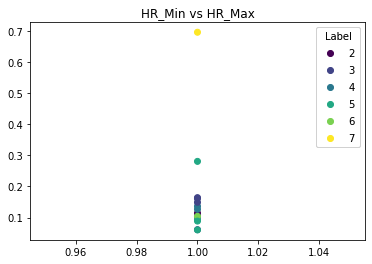

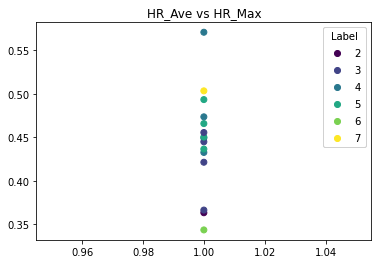

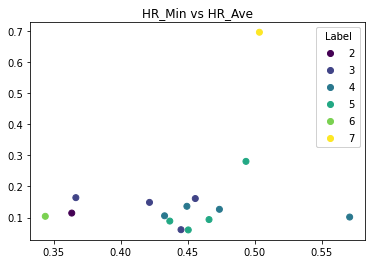

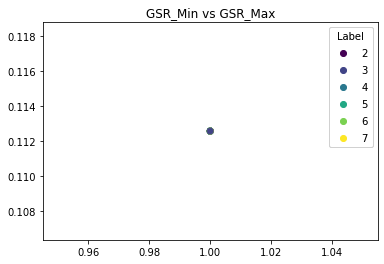

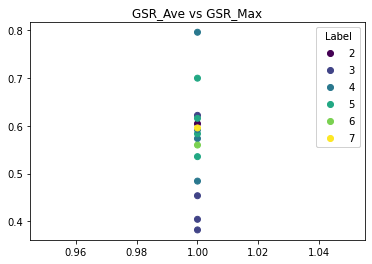

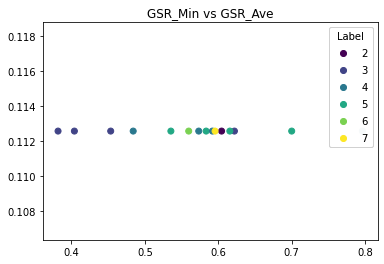

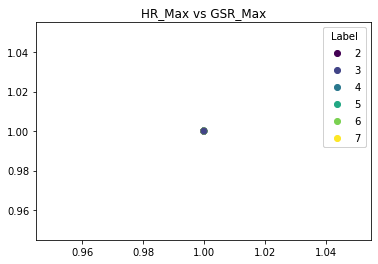

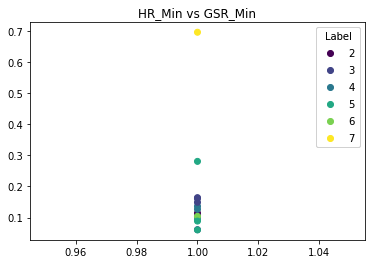

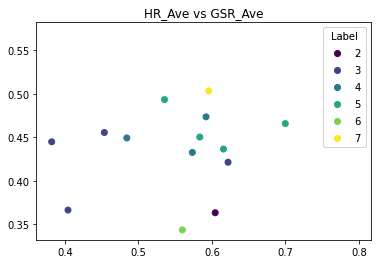

In [37]:
figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df_test[stress_df_test.columns[0]],stress_df_test[stress_df_test.columns[2]], c=stress_df_test[stress_df_test.columns[6]], cmap="viridis")
plt.title("HR_Min vs HR_Max")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()
figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df_test[stress_df_test.columns[0]],stress_df_test[stress_df_test.columns[4]], c=stress_df_test[stress_df_test.columns[6]], cmap="viridis")
plt.title("HR_Ave vs HR_Max")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()
figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df_test[stress_df_test.columns[4]],stress_df_test[stress_df_test.columns[2]], c=stress_df_test[stress_df_test.columns[6]], cmap="viridis")
plt.title("HR_Min vs HR_Ave")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()

figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df_test[stress_df_test.columns[1]],stress_df_test[stress_df_test.columns[3]], c=stress_df_test[stress_df_test.columns[6]], cmap="viridis")
plt.title("GSR_Min vs GSR_Max")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()
figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df_test[stress_df_test.columns[1]],stress_df_test[stress_df_test.columns[5]], c=stress_df_test[stress_df_test.columns[6]], cmap="viridis")
plt.title("GSR_Ave vs GSR_Max")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()
figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df_test[stress_df_test.columns[5]],stress_df_test[stress_df_test.columns[3]], c=stress_df_test[stress_df_test.columns[6]], cmap="viridis")
plt.title("GSR_Min vs GSR_Ave")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()

figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df_test[stress_df_test.columns[1]],stress_df_test[stress_df_test.columns[0]], c=stress_df_test[stress_df_test.columns[6]], cmap="viridis")
plt.title("HR_Max vs GSR_Max")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()
figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df_test[stress_df_test.columns[1]],stress_df_test[stress_df_test.columns[2]], c=stress_df_test[stress_df_test.columns[6]], cmap="viridis")
plt.title("HR_Min vs GSR_Min")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()
figure, ax1 = plt.subplots()
scatter = ax1.scatter(stress_df_test[stress_df_test.columns[5]],stress_df_test[stress_df_test.columns[4]], c=stress_df_test[stress_df_test.columns[6]], cmap="viridis")
plt.title("HR_Ave vs GSR_Ave")
legend1 = ax1.legend(*scatter.legend_elements(), loc="upper right", title="Label")
ax1.add_artist(legend1)
plt.show()

In [41]:
#Testing model

# saved_model_name = "log_model_all.sav"
# clf = pickle.load(open(saved_model_name, 'rb'))

tp = 0
fp = 0
tn = 0
fn = 0

predicted_labels = []
actual_labels = []

for i in range(len(stress_df)):
    predicted_label = clf.predict([stress_df.iloc[i, 0:6]])[0]
    print(i)
    actual_label = stress_df.iloc[i, 6]

    if predicted_label >= 5:
        print("Predicted: Stressed", predicted_label)
        if actual_label >= 5:
            print("Actual: Stressed", actual_label)
            tp += 1
        else:
            print("Actual: Not Stressed", actual_label)  
            fp += 1
            
    else:
        print("Predicted: Not Stressed", predicted_label)
        if actual_label >= 5:
            print("Actual: Stressed", actual_label)
            fn += 1 
        else:
            print("Actual: Not Stressed", actual_label)
            tn += 1
    
    predicted_labels.append(predicted_label)
    actual_labels.append(actual_label)
    
print("\nTotal:", tp+tn+fp+fn, "\n")

acc = (tp+tn)/(tp+tn+fp+fn)*100
sensitivity = tp/(tp+fn)*100 # true positive rate
specificity = tn/(tn+fp)*100# true negative rate
#precision = tp/(tp+fp)*100

print("TP: {}, TN = {}, FP: {}, FN: {}".format(tp, tn, fp, fn))
print("Accuracy: {}, Sensitivity: {}, Specificity: {}".format(acc, sensitivity, specificity))

0
Predicted: Not Stressed 4
Actual: Not Stressed 2
1
Predicted: Not Stressed 3
Actual: Stressed 6
2
Predicted: Not Stressed 4
Actual: Not Stressed 4
3
Predicted: Not Stressed 4
Actual: Stressed 7
4
Predicted: Stressed 6
Actual: Stressed 6
5
Predicted: Not Stressed 3
Actual: Not Stressed 4
6
Predicted: Not Stressed 4
Actual: Not Stressed 4
7
Predicted: Not Stressed 3
Actual: Stressed 5
8
Predicted: Not Stressed 3
Actual: Not Stressed 3
9
Predicted: Not Stressed 3
Actual: Not Stressed 2
10
Predicted: Not Stressed 3
Actual: Not Stressed 4
11
Predicted: Not Stressed 4
Actual: Not Stressed 3
12
Predicted: Not Stressed 3
Actual: Not Stressed 1
13
Predicted: Not Stressed 3
Actual: Not Stressed 4
14
Predicted: Not Stressed 3
Actual: Stressed 6
15
Predicted: Not Stressed 4
Actual: Stressed 7
16
Predicted: Not Stressed 3
Actual: Not Stressed 2
17
Predicted: Not Stressed 4
Actual: Stressed 5
18
Predicted: Not Stressed 3
Actual: Not Stressed 2
19
Predicted: Not Stressed 4
Actual: Not Stressed 4
20

In [42]:
#confusion matrix
cm = metrics.confusion_matrix(actual_labels, predicted_labels)
print(cm)
print(predicted_labels)

[[0 0 1 0 0 0 0]
 [0 0 4 2 0 0 0]
 [0 0 6 3 0 0 0]
 [0 0 4 8 0 1 0]
 [0 0 1 6 1 0 0]
 [0 0 2 0 0 3 0]
 [0 0 0 5 0 0 0]]
[4, 3, 4, 4, 6, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 6, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 6, 3, 4, 4, 3, 4, 5, 3, 6, 4, 4, 4, 3]


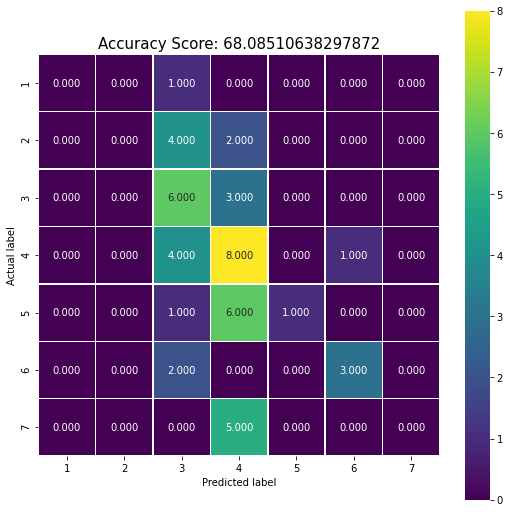

In [44]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis', xticklabels=[1,2,3,4,5,6,7], yticklabels=[1,2,3,4,5,6,7]);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);